<a href="https://colab.research.google.com/github/shobhitsundriyal/time_series/blob/master/Time_series_prediction_LSTM_tf_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### First simple forcastig of sine wave

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.set(style='whitegrid', palette='muted')
RANDOM_SEED = 777
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

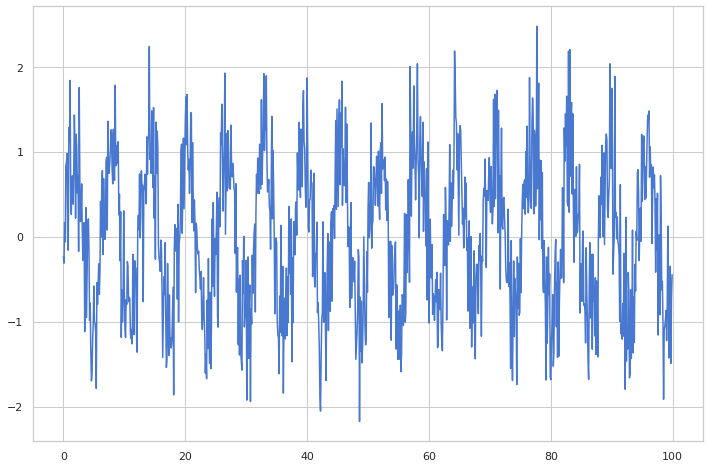

In [40]:
time = np.arange(0, 100, 0.1)
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))
sns.lineplot(time, sin)

In [41]:
df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

800 200


Data is like: x= previous n(time_steps) history, y=current value ↓

In [0]:
def create_dataset(X, y, time_steps=1):
  Xs, ys = [], []
  
  for i in range(len(X) - time_steps):
    val = X.iloc[i: (i + time_steps)].values
    Xs.append(val)
    ys.append(y.iloc[i + time_steps])

  return np.array(Xs), np.array(ys)

def plot_model_history(his):
  plt.plot(his.history['loss'])
  plt.plot(his.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [44]:
time_steps = 10

x_train, y_train = create_dataset(train, train.sine, time_steps)
x_test, y_test = create_dataset(test, test.sine, time_steps)
print(x_train.shape, y_train.shape)

(790, 10, 1) (790,)


##### Model

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units=128, 
                            input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(lr=0.001))

The LSTM layer expects the number of time steps and the number of features to work properly. The
rest of the model looks like a regular regression model

Note: Never shuffle time series data obviously ;->

In [46]:
his = model.fit(x_train, y_train, epochs=30, batch_size=16,
                validation_split=0.1, shuffle=False)

Epoch 1/30
45/45 [==============================] - 1s 16ms/step - loss: 0.4153 - val_loss: 0.3718
Epoch 2/30
45/45 [==============================] - 0s 9ms/step - loss: 0.3280 - val_loss: 0.3394
Epoch 3/30
45/45 [==============================] - 0s 9ms/step - loss: 0.3190 - val_loss: 0.3406
Epoch 4/30
45/45 [==============================] - 0s 9ms/step - loss: 0.3166 - val_loss: 0.3415
Epoch 5/30
45/45 [==============================] - 0s 9ms/step - loss: 0.3147 - val_loss: 0.3423
Epoch 6/30
45/45 [==============================] - 0s 9ms/step - loss: 0.3132 - val_loss: 0.3428
Epoch 7/30
45/45 [==============================] - 0s 9ms/step - loss: 0.3118 - val_loss: 0.3430
Epoch 8/30
45/45 [==============================] - 0s 9ms/step - loss: 0.3106 - val_loss: 0.3430
Epoch 9/30
45/45 [==============================] - 0s 9ms/step - loss: 0.3093 - val_loss: 0.3427
Epoch 10/30
45/45 [==============================] - 0s 9ms/step - loss: 0.3082 - val_loss: 0.3425
Epoch 11/30
45/45 

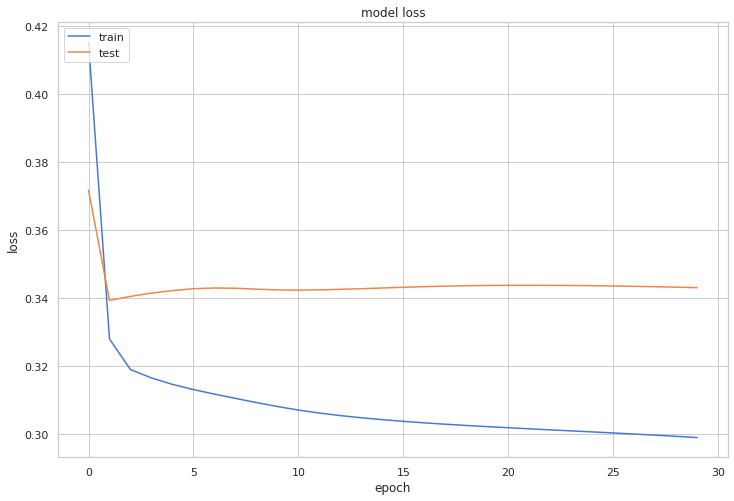

In [47]:
plot_model_history(his)

Evaluation of model

In [0]:
y_pred = model.predict(x_test)

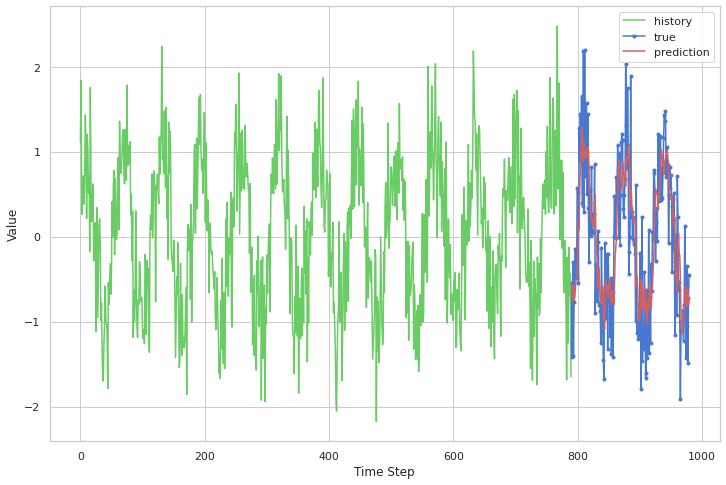

In [49]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

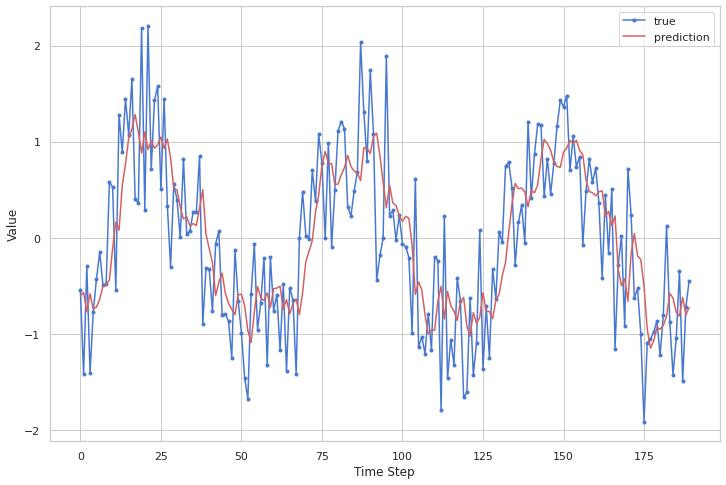

In [50]:
# plotting only test part
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

---

##### Let's try with only 5 time_steps


(795, 5, 1) (795,)
Epoch 1/30
45/45 [==============================] - 1s 15ms/step - loss: 0.4309 - val_loss: 0.3662
Epoch 2/30
45/45 [==============================] - 0s 7ms/step - loss: 0.3406 - val_loss: 0.3567
Epoch 3/30
45/45 [==============================] - 0s 7ms/step - loss: 0.3298 - val_loss: 0.3531
Epoch 4/30
45/45 [==============================] - 0s 7ms/step - loss: 0.3243 - val_loss: 0.3528
Epoch 5/30
45/45 [==============================] - 0s 7ms/step - loss: 0.3219 - val_loss: 0.3535
Epoch 6/30
45/45 [==============================] - 0s 7ms/step - loss: 0.3205 - val_loss: 0.3544
Epoch 7/30
45/45 [==============================] - 0s 7ms/step - loss: 0.3194 - val_loss: 0.3553
Epoch 8/30
45/45 [==============================] - 0s 7ms/step - loss: 0.3186 - val_loss: 0.3560
Epoch 9/30
45/45 [==============================] - 0s 7ms/step - loss: 0.3179 - val_loss: 0.3566
Epoch 10/30
45/45 [==============================] - 0s 7ms/step - loss: 0.3173 - val_loss: 0.3570

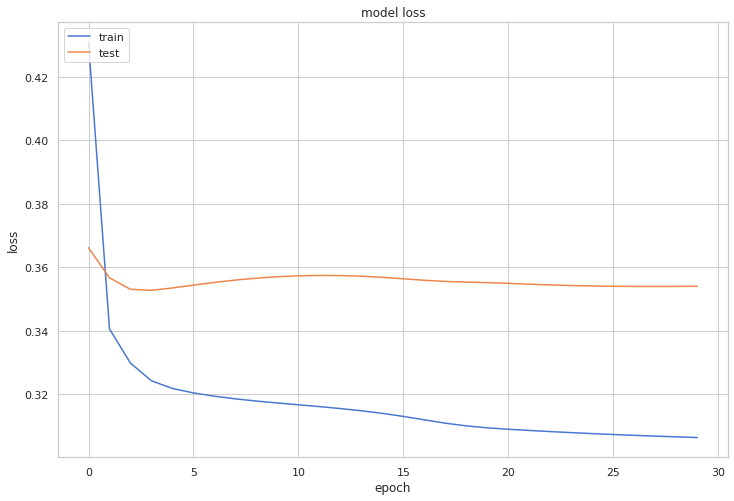

In [53]:
x_train, y_train = create_dataset(train, train.sine, 5)
x_test, y_test = create_dataset(test, test.sine, 5)
print(x_train.shape, y_train.shape)

model = keras.Sequential()
model.add(keras.layers.LSTM(units=128, 
                            input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(lr=0.001))

his = model.fit(x_train, y_train, epochs=30, batch_size=16,
                validation_split=0.1, shuffle=False)
plot_model_history(his)

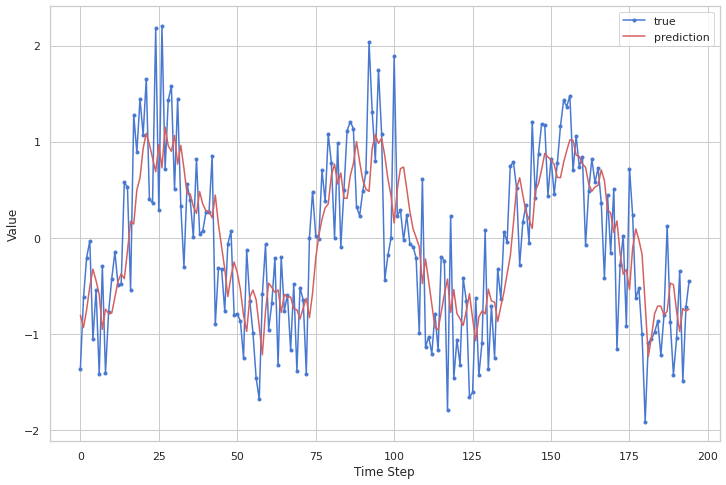

In [54]:
y_pred = model.predict(x_test)
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

---

##### Once more with 25 time_steps

(775, 25, 1) (775,)
Epoch 1/30
44/44 [==============================] - 1s 28ms/step - loss: 0.3665 - val_loss: 0.3219
Epoch 2/30
44/44 [==============================] - 1s 21ms/step - loss: 0.2802 - val_loss: 0.3131
Epoch 3/30
44/44 [==============================] - 1s 21ms/step - loss: 0.2724 - val_loss: 0.3129
Epoch 4/30
44/44 [==============================] - 1s 21ms/step - loss: 0.2709 - val_loss: 0.3123
Epoch 5/30
44/44 [==============================] - 1s 20ms/step - loss: 0.2692 - val_loss: 0.3129
Epoch 6/30
44/44 [==============================] - 1s 20ms/step - loss: 0.2681 - val_loss: 0.3134
Epoch 7/30
44/44 [==============================] - 1s 20ms/step - loss: 0.2671 - val_loss: 0.3140
Epoch 8/30
44/44 [==============================] - 1s 20ms/step - loss: 0.2663 - val_loss: 0.3150
Epoch 9/30
44/44 [==============================] - 1s 20ms/step - loss: 0.2656 - val_loss: 0.3168
Epoch 10/30
44/44 [==============================] - 1s 20ms/step - loss: 0.2651 - val_lo

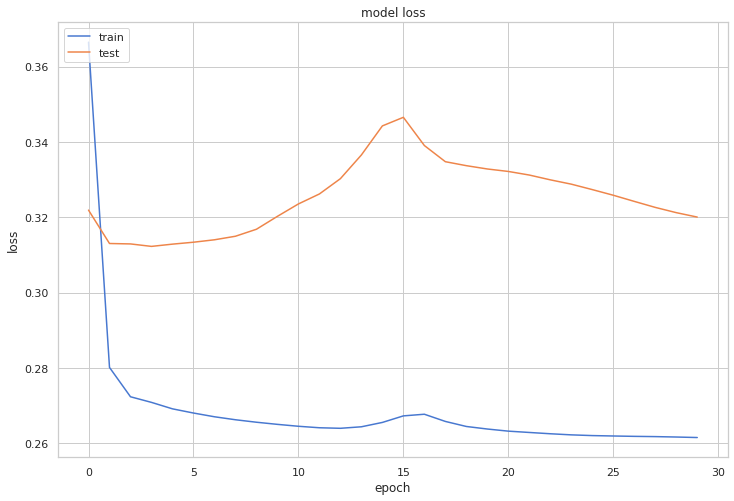

In [55]:
x_train, y_train = create_dataset(train, train.sine, 25)
x_test, y_test = create_dataset(test, test.sine, 25)
print(x_train.shape, y_train.shape)

model = keras.Sequential()
model.add(keras.layers.LSTM(units=128, 
                            input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(lr=0.001))

his = model.fit(x_train, y_train, epochs=30, batch_size=16,
                validation_split=0.1, shuffle=False)
plot_model_history(his)

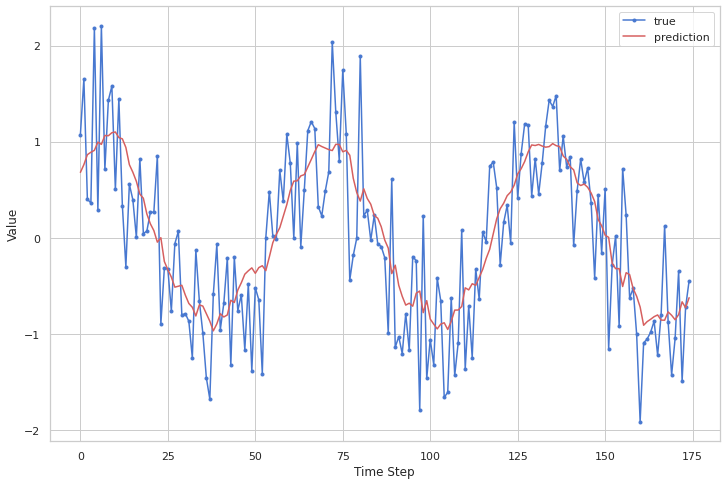

In [56]:
y_pred = model.predict(x_test)
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

Quite smooth, genrealized curve